In [1]:
from sklearn.ensemble import  RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import FunctionTransformer
from sklearn import preprocessing
import xgboost as xgb
from xgboost.sklearn import  XGBClassifier
import numpy as np
import pandas as pd
import importlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
import seaborn as sns
from scipy.stats import norm
import sys
sys.path.append("../bayseg")
import bayseg

C:\Users\CGRE-HiWi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [322]:
data = pd.read_csv("../bayseg/data/2016-ml-contest-Hall/training_data.csv")

In [3]:
facies = np.unique(data["Facies"].values)

In [4]:
facie_data = [data[data["Facies"] ==i] for i in facies]

In [5]:
feature_names =  ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND','PE']
feature_vectors = [facie_data[i-1][feature_names] for i in facies]

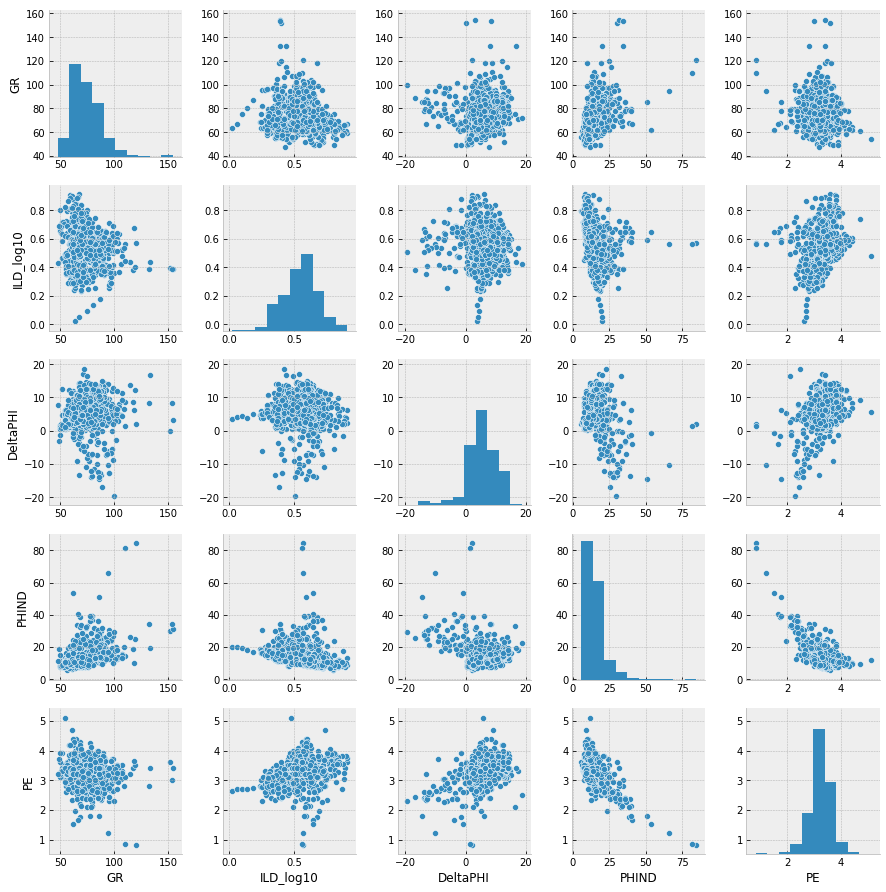

In [6]:
sns.pairplot(feature_vectors[1])

In [7]:
def normalize_feature_vectors(feature_vectors):
    return (feature_vectors - np.mean(feature_vectors, axis=0).T) / np.std(feature_vectors, axis=0)

In [8]:
feature_norm = [normalize_feature_vectors(feature_vectors[i-1]) for i in facies]

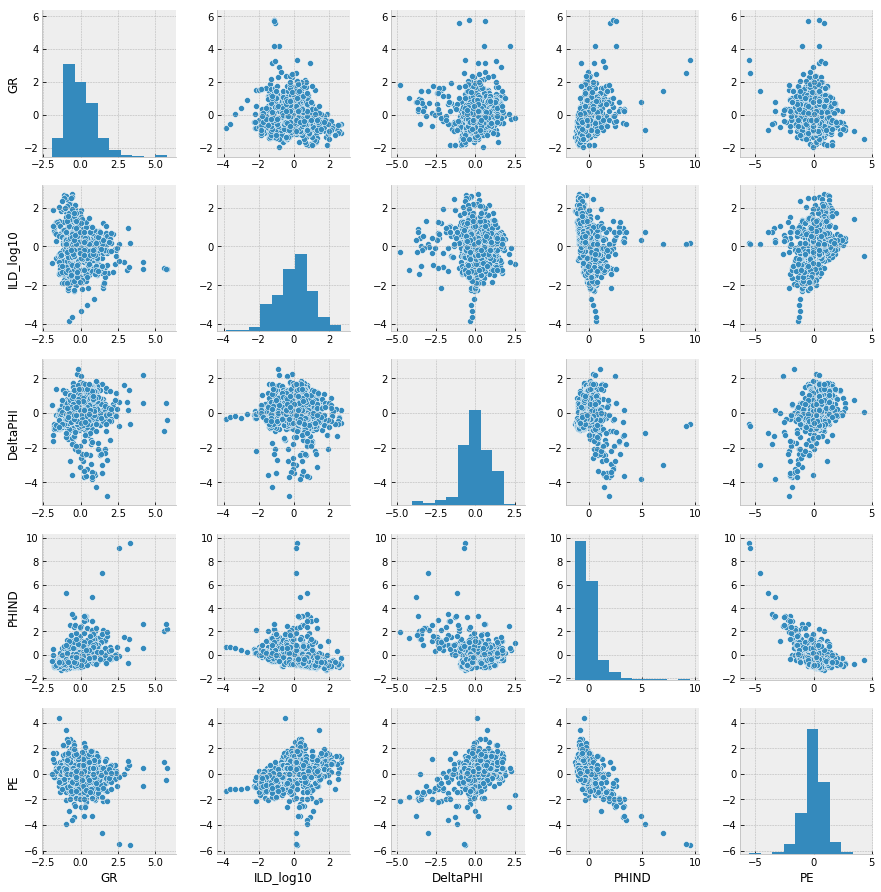

In [9]:
sns.pairplot(feature_norm[1])

In [10]:
#std_scale = [preprocessing.StandardScaler().fit(feature_vectors[i-1][feature_names]) for i in facies]
#feature_std = [std_scale[i-1].transform(feature_vectors[i-1][feature_names]) for i in facies]
#minmax_scale = [preprocessing.MinMaxScaler().fit(feature_vectors[i-1][feature_names]) for i in facies]
#feature_minmax =[minmax_scale[i-1].transform(feature_vectors[i-1][feature_names]) for i in facies]

In [356]:
feature = facie_data[8][feature_names]
n = len(feature_names)
sample = [feature.values[:,i] for i in range(0,n)]
sample

[array([  32.78 ,   23.5  ,   28.33 ,   31.12 ,   28.68 ,   31.67 ,
          39.75 ,   36.56 ,   36.56 ,   37.21 ,   35.8  ,   36.56 ,
          32.78 ,   23.5  ,   28.33 ,   31.12 ,   28.68 ,   31.67 ,
          39.75 ,   36.56 ,   36.56 ,   37.21 ,   35.8  ,   36.56 ,
          36.084,   29.344,   19.462,   19.552,   20.653,   23.371,
          31.453,   37.844,   43.313,   41.906,   35.063,   32.531,
          30.906,   32.188,   34.281,   40.844,   52.281,   48.125,
          49.406,   42.688,   41.438,   37.219,   38.656,   43.   ,
          42.531,   41.188,   38.25 ,   39.219,   40.938,   38.   ,
          37.938,   35.156,   36.094,   37.063,   41.   ,   42.031,
          43.344,   40.906,   40.531,   39.5  ,   42.281,   46.063,
          47.063,   45.719,   42.406,   41.594,   44.531,   49.25 ,
          59.594,   74.   ,  127.5  ,  185.25 ,  222.5  ,   74.   ,
          18.297,   26.609,   32.31 ,   26.09 ,   22.37 ,   19.97 ,
          18.36 ,   16.5  ,   14.84 ,   15.72 , 

In [357]:
def cdf(data):

    data_size=len(data)

    # Set bins edges
    data_set=sorted(set(data))
    bins=np.append(data_set, data_set[-1]+1)

    # Use the histogram function to bin the data
    counts, bin_edges = np.histogram(data, bins=bins, density=False)

    counts=counts.astype(float)/data_size

    # Find the cdf
    cdf = np.cumsum(counts)
    print(cdf.shape)
    
    # Plot the cdf
    plt.plot(bin_edges[0:-1], cdf,linestyle='-', marker="o", color='b')
    plt.ylim((0,1))
    plt.ylabel("CDF")
    plt.grid(True)

    plt.show()

(96,)


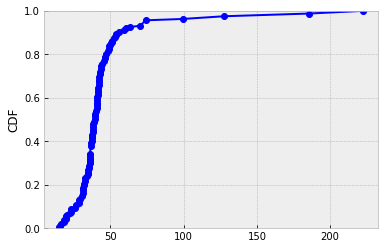

(94,)


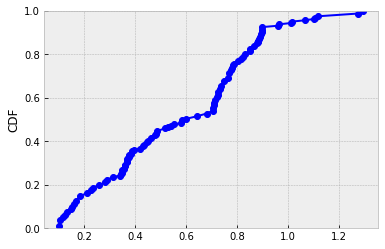

(89,)


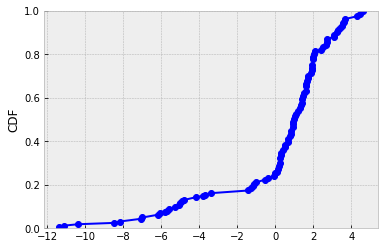

(93,)


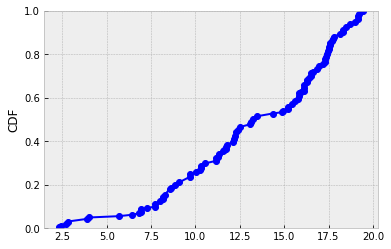

(71,)


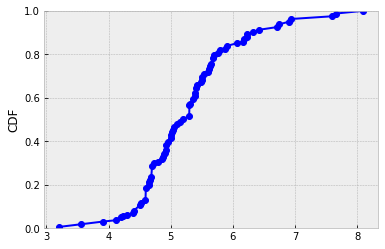

In [358]:
for i in range(0,n):
    cdf(feature.values[:,i])

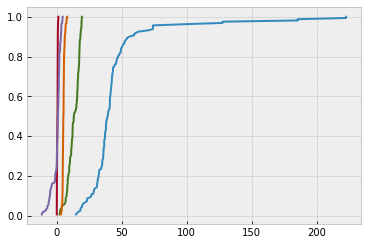

[array([ 86,  87,  85,  78, 159,  84,  26,  27,  83,  28,  82,  29,   1,
         13,  81,  79, 160,  14,   2,  16,   4,  25,  36, 117,   3,  15,
         30, 111,   5,  17,  37, 118,  80,  35, 116,   0,  12, 119,  38,
         93,  94,  34, 115, 136,  55,  96,  10,  22,  95,  91,  90,  24,
        137,  56,  92,  23,  19,  20,   7,   8,  11,  57, 138,  21,   9,
         45, 126,  89,  97,  31, 112,  54, 135,  53, 134,  50, 131,  46,
        127, 132,  51, 144,  63,  18,   6,  62, 143,  39, 120,  61, 142,
        133,  52,  58, 139,  49, 130, 125,  44,  69, 150,  98, 114,  33,
         59, 140,  64, 145,  68, 149,  48, 129, 124,  43, 128,  47, 113,
         32, 141,  60, 151,  70, 148,  67,  65, 146,  99, 147,  66, 122,
         41,  71, 152, 123,  42, 104, 103,  88, 100, 121,  40, 102, 109,
        101, 110, 153,  72, 105, 108, 107, 154, 158,  77,  73, 106,  74,
        155,  75, 156,  76, 157], dtype=int64),
 array([ 58, 139, 138,  59,  57, 140,  56, 137,  60, 141,  55, 136,  54,
   

In [359]:
index = [np.arange(0,len(sample[i])) for i in range(0,n)]
sample_ = [np.vstack((index[i], sample[i])) for i in range(0,n)]
indece = [np.argsort(sample_[i][1,:]) for i in range(0,n)]
sorted_data = [np.sort(sample[i]) for i in range(0,n)]

yvals= [np.arange(1,len(sorted_data[i])+1)/float(len(sorted_data[i])) for i in range(0,n)]

[plt.plot(sorted_data[i],yvals[i]) for i in range(0,n)]

plt.show()

indece

[[<matplotlib.lines.Line2D at 0x28bdb318780>],

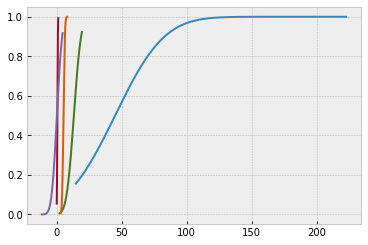

In [360]:
from scipy.stats import norm
std = [np.std(sample[i]) for i in range(0,n)]
mean = [np.mean(sample[i]) for i in range(0,n)]
rng = [np.linspace(np.min(sample[i]),np.max(sample[i]),1000) for i in range(0,n)]
dist = [norm(mean[i], std[i]) for i in range(0,n)]
[plt.plot(rng[i], dist[i].cdf(rng[i])) for i in range(0,n)]


In [361]:
dist[0].ppf(yvals[0])


array([ -29.44733897,  -21.83311278,  -17.04696194,  -13.47336157,
        -10.58557251,   -8.14239661,   -6.01232511,   -4.11540542,
         -2.39923916,   -0.82754027,    0.62590448,    1.98067657,
          3.25180706,    4.45109728,    5.58799073,    6.67016796,
          7.70396414,    8.69466931,    9.64674888,   10.5640086 ,
         11.44972006,   12.30671753,   13.13747368,   13.9441596 ,
         14.72869265,   15.49277529,   16.23792662,   16.96550838,
         17.67674642,   18.37274865,   19.05452012,   19.72297575,
         20.37895112,   21.02321171,   21.65646087,   22.27934659,
         22.89246751,   23.496378  ,   24.0915927 ,   24.67859049,
         25.25781791,   25.82969227,   26.39460436,   26.95292084,
         27.50498643,   28.05112581,   28.59164535,   29.12683463,
         29.65696791,   30.1823053 ,   30.70309397,   31.21956915,
         31.73195507,   32.24046585,   32.74530626,   33.24667244,
         33.74475258,   34.2397275 ,   34.73177123,   35.22105

In [362]:
yvals[0]

array([ 0.00621118,  0.01242236,  0.01863354,  0.02484472,  0.0310559 ,
        0.03726708,  0.04347826,  0.04968944,  0.05590062,  0.0621118 ,
        0.06832298,  0.07453416,  0.08074534,  0.08695652,  0.0931677 ,
        0.09937888,  0.10559006,  0.11180124,  0.11801242,  0.1242236 ,
        0.13043478,  0.13664596,  0.14285714,  0.14906832,  0.1552795 ,
        0.16149068,  0.16770186,  0.17391304,  0.18012422,  0.1863354 ,
        0.19254658,  0.19875776,  0.20496894,  0.21118012,  0.2173913 ,
        0.22360248,  0.22981366,  0.23602484,  0.24223602,  0.2484472 ,
        0.25465839,  0.26086957,  0.26708075,  0.27329193,  0.27950311,
        0.28571429,  0.29192547,  0.29813665,  0.30434783,  0.31055901,
        0.31677019,  0.32298137,  0.32919255,  0.33540373,  0.34161491,
        0.34782609,  0.35403727,  0.36024845,  0.36645963,  0.37267081,
        0.37888199,  0.38509317,  0.39130435,  0.39751553,  0.40372671,
        0.40993789,  0.41614907,  0.42236025,  0.42857143,  0.43

In [363]:
new_sample = [dist[i].ppf(yvals[i]) for i in range(0,n)]
new_sample

[array([ -29.44733897,  -21.83311278,  -17.04696194,  -13.47336157,
         -10.58557251,   -8.14239661,   -6.01232511,   -4.11540542,
          -2.39923916,   -0.82754027,    0.62590448,    1.98067657,
           3.25180706,    4.45109728,    5.58799073,    6.67016796,
           7.70396414,    8.69466931,    9.64674888,   10.5640086 ,
          11.44972006,   12.30671753,   13.13747368,   13.9441596 ,
          14.72869265,   15.49277529,   16.23792662,   16.96550838,
          17.67674642,   18.37274865,   19.05452012,   19.72297575,
          20.37895112,   21.02321171,   21.65646087,   22.27934659,
          22.89246751,   23.496378  ,   24.0915927 ,   24.67859049,
          25.25781791,   25.82969227,   26.39460436,   26.95292084,
          27.50498643,   28.05112581,   28.59164535,   29.12683463,
          29.65696791,   30.1823053 ,   30.70309397,   31.21956915,
          31.73195507,   32.24046585,   32.74530626,   33.24667244,
          33.74475258,   34.2397275 ,   34.73177

In [364]:
for i in range(0,n):
    new_sample[i][-1] = dist[i].ppf(0.999)

In [365]:
withindece = [np.vstack((indece[i],new_sample[i])) for i in range(0,n)]

In [366]:
def resort(data):
    frame  =  pd.DataFrame({
              'indece': data[0], 
              'values': data[1]})
    frame = frame.sort_values(by=['indece'])
    values = frame["values"].values
    return values

In [367]:
values = [resort(withindece[i]) for i in range(0,n)]
values

[array([  22.27934659,    3.25180706,    9.64674888,   14.72869265,
          11.44972006,   17.67674642,   46.96196249,   34.73177123,
          35.22105151,   37.63149073,   28.59164535,   35.7077303 ,
          22.89246751,    4.45109728,    8.69466931,   15.49277529,
          10.5640086 ,   18.37274865,   46.49817455,   33.74475258,
          34.2397275 ,   37.1536994 ,   29.12683463,   33.24667244,
          31.21956915,   12.30671753,   -6.01232511,   -4.11540542,
          -0.82754027,    1.98067657,   16.23792662,   39.99514941,
          63.35995465,   56.00980642,   25.82969227,   21.02321171,
          13.13747368,   19.05452012,   24.0915927 ,   48.35683321,
          79.1905504 ,   71.38181036,   74.26178372,   61.16291366,
          53.56259481,   38.10741792,   43.71977827,   62.24957258,
          59.5722537 ,   52.12306828,   42.79259652,   45.10872362,
          50.70034017,   41.86338235,   40.93121405,   27.50498643,
          32.24046585,   36.1919642 ,   51.17294

In [391]:

raw = pd.DataFrame({'GR': values[0], 
        'ILD_log10': values[1], 
        'DeltaPHI': values[2], 
        'PHIND': values[3],
        'PE': values[4]})

facie8= pd.DataFrame(raw, columns = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND','PE'])
facie8.to_csv('facie8_normal.csv')
facie8

,GR,ILD_log10,DeltaPHI,PHIND,PE
0,22.279347,0.661483,0.471332,13.125054,5.237266
1,3.251807,0.642339,-1.099788,12.441635,5.289413
2,9.646749,0.609454,-0.782757,11.881460,5.406961
3,14.728693,0.600153,1.771168,11.446771,5.420115
4,11.449720,0.632876,2.116769,10.993607,5.595248
5,17.676746,0.647096,1.443226,10.915819,5.609176
6,46.961962,0.680995,-0.173827,10.432016,5.680231
7,34.731771,0.700976,2.486680,9.024578,5.393834
8,35.221052,0.706059,2.551309,9.235702,5.380731
9,37.631491,0.716342,3.508935,7.772356,5.784753


In [392]:
data.loc[data["Facies"] ==0,feature_names] = facie0.values
data.to_csv('Nomalised_data.csv')

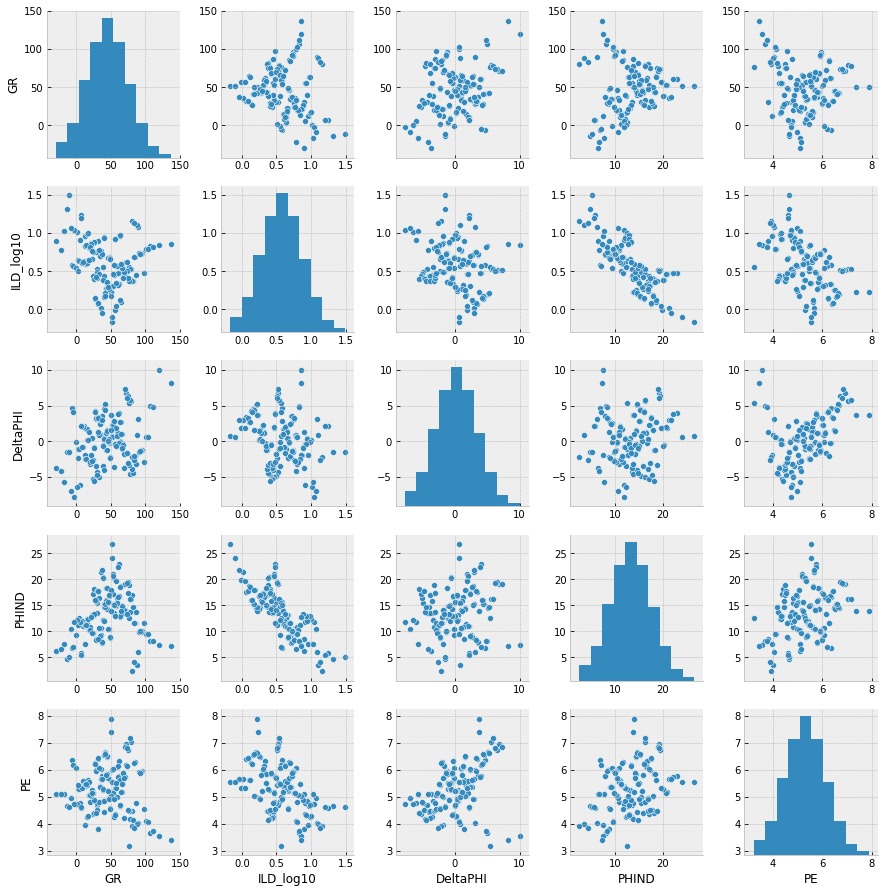

In [319]:
sns.pairplot(facie8)